### Milestone :1 Predicting the Demand for Used Vehicles

There is an automobile company XYZ from USA which aspires to enter the US used car market by setting up their company locally to give competition to their counterparts. They want to understand the factors affecting the pricing of cars in the market, since those may be vastly different from the new car market.
       
The market for used cars has witnessed a significant surge in demand in recent times, surpassing that of new cars. Consequently, pricing strategies for used vehicles have become crucial for businesses to remain competitive in the market. The value of a used car is influenced by a multitude of factors, such as mileage, model, and year of production. It is imperative for industry players to consider these variables while determining the actual worth of a used car.
      
First step document that lists the output of your exploratory analysis, any issues, or problems you may see with data that need follow-up, and some basic descriptive analysis that you think highlights important outcomes/findings from the data. Based on your findings, the next level of analysis will be charted out. Build a multiple linear regression model for predicting the price of a used car and provide meaningful inferences.


**Dataset: Used_cars_sales.xlsx**

**Data Dictionary**

    Name 	                 Name of the Car on Sell
    City 	                 City of the Car on Sell
    Years             	     Year of manufacture
    Km_driven  	             Kms Car travelled
    Fuel_Type  	             Petrol, Diesel, CNG
    Transmission  	         Manual, Automatic
    Owner_Type     	         First, Second, Third
    Mileage  	             Mileage of the Car
    Engine 	                 Engine Displacement
    Power             	     Power of Engine
    Seats              	     No. of Seats in Car
    Selling_price   	     Selling price of a Car (Target)

**Initial Guidelines:**

Ensure to follow to Use Id’s provided by UNext for naming file as conventions.


### General Instructions

- The assessment has 16 questions, each question is a separate function
- The cells in the Jupyter notebook can be executed any number of times for testing the solution
- Refrain from modifying the boilerplate code as it may lead to unexpected behavior
- The solution is to be written between the comments `# code starts here` and `# code ends here`
- On completing all the questions, the assessment is to be submitted on moodle for evaluation
- The kernel of the Jupyter notebook is to be set as `Python 3 (ipykernel)` if not set already
- Include imports as necessary
- For each of the task, `Note` section will provide you hints to solve the problem.

#### **Utilize software engineering aspects while building Machine learning model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.**

#### NOTE:
Import various libraries and modules used in data analysis, machine learning, and visualization tasks in Python such as `pandas`, `numpy`, `sklearn`, `matplotlib`, `seaborn`, `statsmodels`, `statsmodels.api`, `sklearn.model_selection`, `sklearn.linear_model`, `sklearn.metrics`, `sklearn.preprocessing`. There are 2 ways to import the libraries and modules:
* import numpy as np
* from sklearn.model_selection import train_test_split

In [1]:
# Required imports
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Task 1: Load the 'car_sales-dataset' available in the Dataset folder within the Project folder on the desktop. Perform preliminary EDA with key observations and insights- (weightage - 40 marks)

#### T1.1: Load the Used_cars_sales dataset using try and except blocks.          (weightage - 2 marks) (AE)        

#### NOTE:
The `read_excel` method in Pandas allows you to read Excel files and convert them into a DataFrame, which is a two-dimensional tabular data structure in Pandas.

In [2]:
import pandas as pd

def load_the_dataset(dataset_location: str) -> pd.DataFrame:
    car_sales = None
    try:
        car_sales = pd.read_excel(dataset_location)
        print("Loaded successfully")
    except FileNotFoundError:
        print("Error: File not found.")
    except Exception as e:
        print(f"Error: {e}")
    return car_sales

# Store the result of the dataset
dataset_location = 'Used_car_sales.xlsx'
car_sales = load_the_dataset(dataset_location)
print(car_sales)


Loaded successfully
      Sales_ID                          name  year  selling_price  km_driven  \
0            1        Maruti Swift Dzire VDI  2014         450000     145500   
1            2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2            3      Honda City 2017-2020 EXi  2006         158000     140000   
3            4     Hyundai i20 Sportz Diesel  2010         225000     127000   
4            5        Maruti Swift VXI BSIII  2007         130000     120000   
...        ...                           ...   ...            ...        ...   
7901      8124             Hyundai i20 Magna  2013         320000     110000   
7902      8125         Hyundai Verna CRDi SX  2007         135000     119000   
7903      8126        Maruti Swift Dzire ZDi  2009         382000     120000   
7904      8127               Tata Indigo CR4  2013         290000      25000   
7905      8128               Tata Indigo CR4  2013         290000      25000   

        fuel seller

#### T1.2: Which brand is selling the most in terms of the number of units sold    (weightage - 2 marks)  (AE)  

**Hint: output should be the name of the brand only.**

#### NOTE:
To count each unique value in the 'name' column of the DataFrame car_sales we can use the value_counts() method. It returns a Series where the index contains unique car names, and the values represent the frequency of each name in the DataFrame.
To find the name of the car brand with the maximum count we can use the idxmax() method on the series. It returns the name of the most selling brand in the DataFrame.

In [3]:
def get_name_value_counts(car_sales):
    most_selling_brand = None
    #code starts here

    most_selling_brand = car_sales['name'].value_counts().head(1)

    #code ends here
    return most_selling_brand
get_name_value_counts(car_sales)

name
Maruti Swift Dzire VDI    129
Name: count, dtype: int64

#### T1.3: Name the top 5 cities with the highest number of cars sold.. (weightage - 2 marks)        (AE)

**Hint: Output should be city name only in the format of list**

#### NOTE:
To calculate the count of each unique value in the 'City' column of the DataFrame data use the value_counts() method. It will returns a Series where the index contains unique city names, and the values represent the frequency of each city in the DataFrame.
Now to select the top 5 cities with the highest sales count use the head() method on the Series. By default, head() returns the first 5 rows of the Series, which in this case, correspond to the cities with the highest sales.

In [4]:
def get_city_value_counts(data):
    city_with_max_sales = None
    #code starts here
    city_with_max_sales = car_sales['City'].value_counts()
    #code ends here
    return city_with_max_sales.head()
# Remove 'name', 'count', and 'dtype' information
city_name=get_city_value_counts(car_sales)
list(city_name.index)

['Delhi', 'Noida', 'Mumbai', 'Coimbatore', 'Vellore']

#### T1.4: Check missing values in the data in terms of percentage using error handling technique and do missing value treatment.  (weightage - 4 marks)       (AE)

#### NOTE:
Find the percentage of missing values in the data by dividing the total number of missing values by the total number of rows and multiplying by 100, you will get the percentage of missing values for each column.

Use `isnull().sum()` to calculate the total number of missing values in each column and `shape[0]` to get the total number of rows in the DataFrame.

In [5]:
def missing_value_check(data):
    missing_percentage = None
    #code starts here
    try:
        # Check for missing values

        total_rows = data.shape[0]
        missing_percentage = (data.isnull().sum() / total_rows) * 100

    except Exception as e:
        return 'An error occurred'

    #code ends here
    return missing_percentage
missing_value_check(car_sales)

Sales_ID         0.000000
name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.240324
seller_type      0.202378
transmission     0.000000
owner            0.000000
mileage          0.000000
engine           0.000000
max_power        0.000000
seats            0.000000
City             0.000000
Postal_code      0.000000
Sales_status     0.000000
dtype: float64

#### NOTE:
For treating the missing value first define the list of columns containing the names of the columns with missing values which will be treated. Iterate over each column in the list:

If the column is numerical, fill the missing values using the mean or median of that column (based on suitability).

If the column is categorical, fill the missing values using the mode (most frequent value) of that column.

In [6]:
def missing_value_treatment(car_sales):
    # Identify columns with missing values
    columns_with_na = [col for col in car_sales.columns if car_sales[col].isnull().any()]

    for col in columns_with_na:
        if car_sales[col].dtype in ['float64', 'int64']:
            # For numeric columns, fill with median (or mean)
            median_val = car_sales[col].median()
            car_sales[col].fillna(median_val, inplace=True)
        else:
            # For categorical columns, fill with mode
            mode_val = car_sales[col].mode()[0]  # mode() returns a Series
            car_sales[col].fillna(mode_val, inplace=True)

    return car_sales

# Apply the treatment
car_sales = missing_value_treatment(car_sales)
print(car_sales.isnull().sum())


Sales_ID         0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
City             0
Postal_code      0
Sales_status     0
dtype: int64


/tmp/ipykernel_4758/1220269804.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales[col].fillna(mode_val, inplace=True)


#### T1.5: Detect Outliers in the data and do outlier treatment. Plot a boxplot to visualize outliers in the data. (weightage – 6 marks)        (AE)     
* The extreme values in selling_price due to genuine market conditions, such as luxury properties.Keep the values as it is.

#### NOTE:
The `sns.boxplot()` function in Seaborn is used to create a box plot visualization, which is a convenient way to visually summarize the distribution of numerical data and identify outliers. Using this detect the outliers in the `car_sales` dataframe.

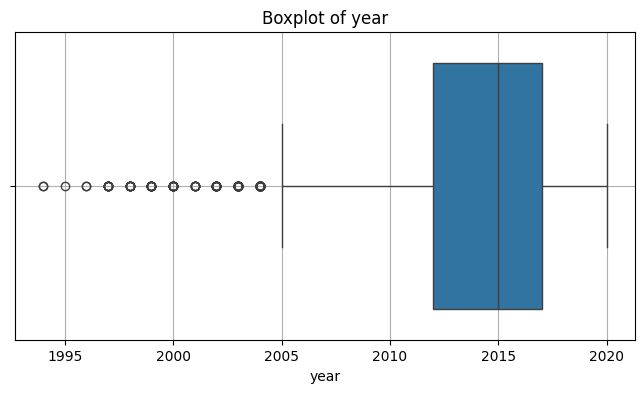

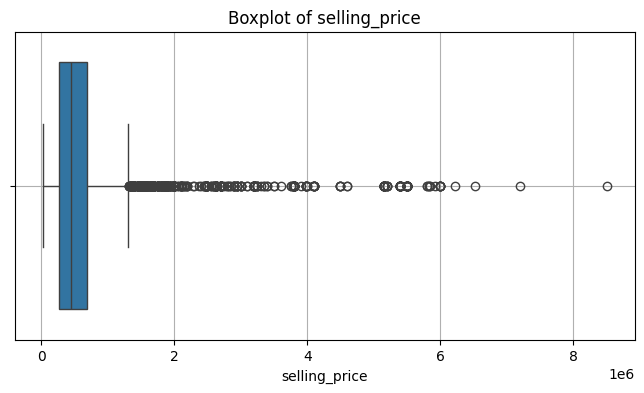

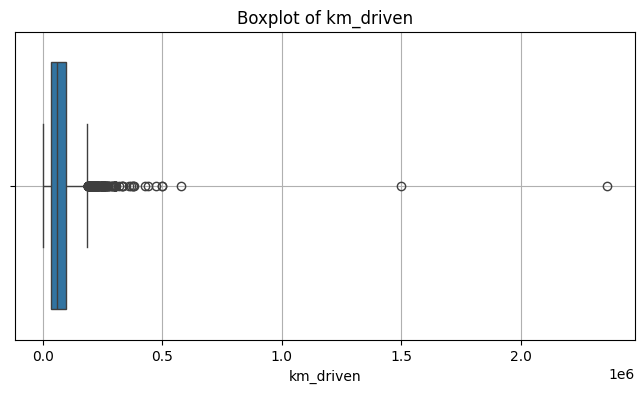

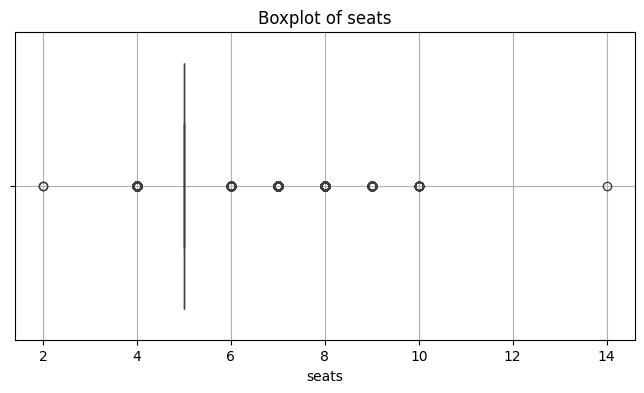

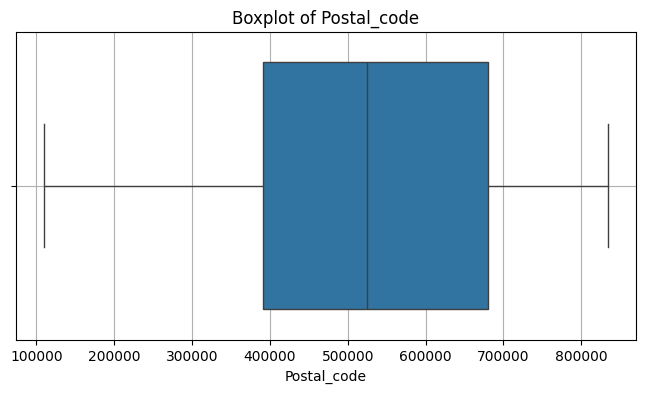

In [7]:
def box_plot1(data):
    # Drop identifier column if exists (optional)
    if 'Sales_ID' in data.columns:
        data = data.drop('Sales_ID', axis=1)

    # Select only numeric columns
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

    # Plot boxplot for each numeric column
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.grid(True)
        plt.show()

    return data

# Call the function
car_sales = box_plot1(car_sales)

#### Define a function `treat_outliers_iqr` to treat outliers using IQR method. Use `median` as treatment method.

#### NOTE:
The outliers in the dataset can be treated using the Interquartile Range (IQR) method. It replaces the outliers with either the median or the mean, based on the specified treatment method. Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR) of the data along with the lower and upper bounds for outliers. Then replace the outliers with the median of the data.

In [8]:
def treat_outliers_iqr(data, treatment='median'):
    data = data.copy()  # Avoid modifying the original DataFrame

    # Identify numeric columns (or specify them if needed)
    numeric_columns = ['km_driven']  # Can be parameterized if needed

    for col in numeric_columns:
        if col in data.columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Compute replacement value
            if treatment == 'median':
                replacement_value = data[col].median()
            elif treatment == 'mean':
                replacement_value = data[col].mean()
            else:
                raise ValueError("treatment must be 'median' or 'mean'")

            # Replace outliers
            data[col] = data[col].apply(
                lambda x: replacement_value if x < lower_bound or x > upper_bound else x
            )
    return data

# Apply treatment
car_sales = treat_outliers_iqr(car_sales, treatment='median')

# Display the treated DataFrame
print(car_sales.head())


                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000   145500.0  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000   120000.0  Diesel   
2      Honda City 2017-2020 EXi  2006         158000   140000.0  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000   127000.0  Diesel   
4        Maruti Swift VXI BSIII  2007         130000   120000.0  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

   seats      City  Postal_code Sales_status  
0      5    Mumbai       400001        

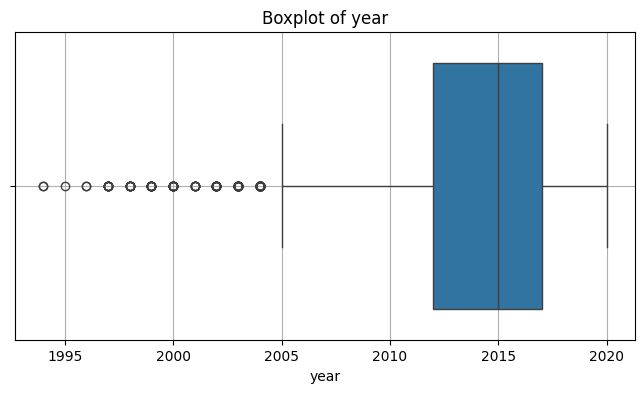

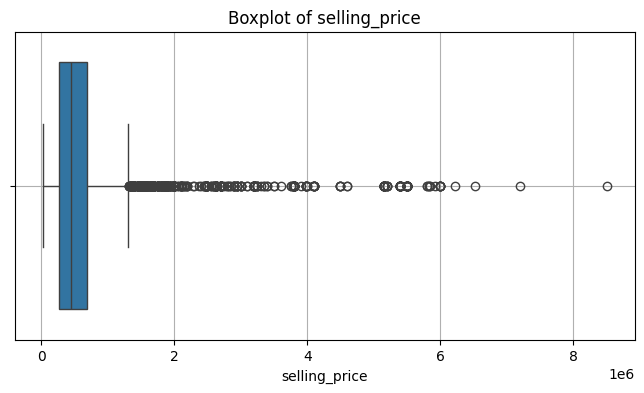

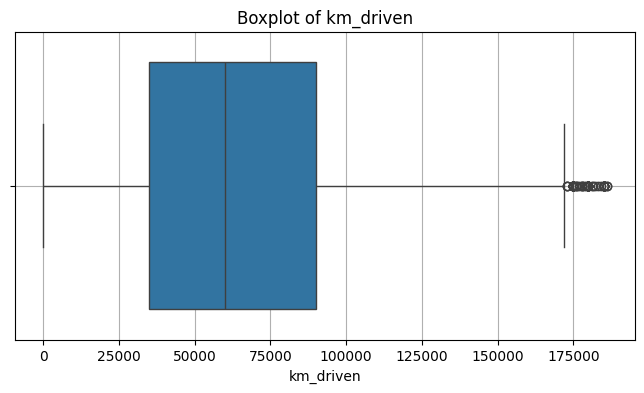

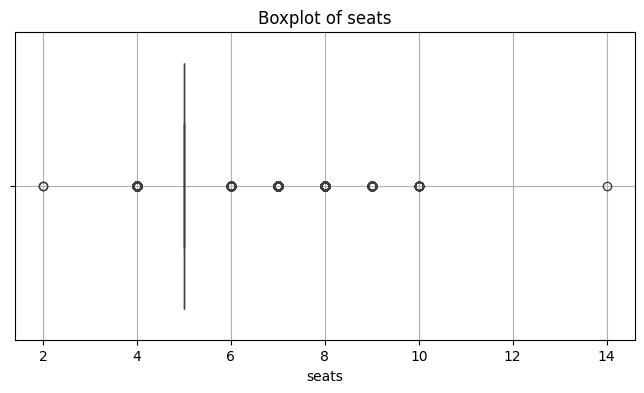

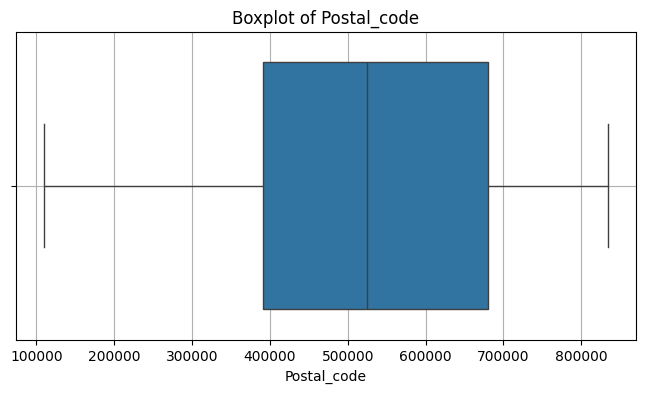

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot2(data):
    # Drop identifier column if it exists
    if 'Sales_ID' in data.columns:
        data = data.drop('Sales_ID', axis=1)

    # Select numeric columns
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Create boxplots for each numeric column
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.grid(True)
        plt.show()

    return  # No data returned, just visualization

# Call the function
box_plot2(car_sales)


#### T1.6: Which variables are significant in predicting the price of a used car? To answer this question, it is important to understand the correlation between the different variables. i.e how much the other features affect the selling price of a used car. (Bivariate analysis) (weightage - 3 marks)               (AE)

#### Cleaning the data

#### NOTE:
To understand the correlation between different variables , we have to convert the non numeric columns into numeric columns. Clean the data type of the 'max_power', 'engine', and 'mileage' columns in a DataFrame by converting them into numeric types by removing the units in order to perform correlation on them.

Removes the following non-numeric suffix using string manipulation functions:
* 'bhp' for max_power,
* 'CC' for engine,
* 'kmpl' or 'km/kg' for mileage

Converts the data type of each of the above column to float

In [10]:
def clean_car_sales_data(df):
    df = df.copy()  # Avoid modifying the original dataframe directly

    # Remove units and convert to float
    if 'max_power' in df.columns:
        df['max_power'] = df['max_power'].str.replace('bhp', '', regex=False).str.strip()
        df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

    if 'engine' in df.columns:
        df['engine'] = df['engine'].str.replace('CC', '', regex=False).str.strip()
        df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

    if 'mileage' in df.columns:
        df['mileage'] = df['mileage'].str.replace('kmpl', '', regex=False)
        df['mileage'] = df['mileage'].str.replace('km/kg', '', regex=False)
        df['mileage'] = df['mileage'].str.strip()
        df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

    return df

# Apply the cleaning function
car_sales = clean_car_sales_data(car_sales)

# Display the cleaned dataframe
car_sales.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Postal_code,Sales_status
0,Maruti Swift Dzire VDI,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Mumbai,400001,Y
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Ranchi,834008,Y
2,Honda City 2017-2020 EXi,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Noida,201301,Y
3,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Dehradun,248141,Y
4,Maruti Swift VXI BSIII,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Chennai,600020,Y


#### Correlation between numerical variables and target variable

#### NOTE:
Using Python function `corr` compute the correlation matrix of a DataFrame df containing numeric columns.
Ensure that only numeric columns are included in the correlation computation.

In [11]:
def corr(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Compute the correlation matrix
    correlation = numeric_df.corr()

    return correlation

# Compute correlation matrix
corr_data = corr(car_sales)
corr_data


,year,selling_price,km_driven,mileage,engine,max_power,seats,Postal_code
year,1.000000,0.413139,-0.502279,0.328544,0.018263,0.226598,-0.007923,0.004923
selling_price,0.413139,1.000000,-0.291603,-0.127900,0.456573,0.749512,0.042065,0.008702
km_driven,-0.502279,-0.291603,1.000000,-0.147062,0.184414,-0.065224,0.205862,-0.008811
mileage,0.328544,-0.127900,-0.147062,1.000000,-0.576408,-0.374621,-0.451700,-0.009599
engine,0.018263,0.456573,0.184414,-0.576408,1.000000,0.703975,0.611103,0.004543
max_power,0.226598,0.749512,-0.065224,-0.374621,0.703975,1.000000,0.191999,0.007089
seats,-0.007923,0.042065,0.205862,-0.451700,0.611103,0.191999,1.000000,-0.004773
Postal_code,0.004923,0.008702,-0.008811,-0.009599,0.004543,0.007089,-0.004773,1.000000


#### T1.7: Come up with Insights and validate the hypothesis:                         (weightage: 15 marks)  (AE)

(i) Is there a statistically significant difference in the average mileage of cars across different fuel types and transmission types?

(ii) Is there a statistically significant difference in the selling prices of cars between individual and dealer sellers?

(iii)Is there a relationship between the type of fuel and transmission in cars?

#### (i) Is there a statistically significant difference in the average mileage of cars across different fuel types and transmission types?

- If yes,print :"There is a significant difference in the average mileage of cars across different fuel types and transmission types"
- If no, print: There is no significant difference in the average mileage of cars across different fuel types and transmission types"

#### NOTE:
Conduct an Analysis of Variance (ANOVA) test to determine if there is a significant difference in the average mileage of cars across different fuel types and transmission types.
* Groups the data to create separate groups for each category.
* Then perform the ANOVA test using the stats.f_oneway() function from the scipy.stats module.
* Compare the obtained p-value with a significance level (alpha)
* Based on the comparison, determine whether there is a significant difference in the average mileage of cars across different fuel types and transmission types.

In [12]:
import scipy.stats as stats

def perform_anova(car_data):
    alpha = 0.05  # significance level

    # Drop missing mileage and categorical columns to avoid issues
    car_data = car_data.dropna(subset=['mileage', 'fuel', 'transmission'])

    # --- ANOVA for Fuel Type ---
    groups_fuel = [group['mileage'].values for name, group in car_data.groupby('fuel')]
    stat_fuel, p_fuel = stats.f_oneway(*groups_fuel)

    if p_fuel < alpha:
        print("There is a significant difference in the average mileage of cars across different fuel types.")
    else:
        print("There is no significant difference in the average mileage of cars across different fuel types.")

    # --- ANOVA for Transmission Type ---
    groups_trans = [group['mileage'].values for name, group in car_data.groupby('transmission')]
    stat_trans, p_trans = stats.f_oneway(*groups_trans)

    if p_trans < alpha:
        print("There is a significant difference in the average mileage of cars across different transmission types.")
    else:
        print("There is no significant difference in the average mileage of cars across different transmission types.")

    return {
        'Fuel Type ANOVA': {'F-statistic': stat_fuel, 'p-value': p_fuel},
        'Transmission Type ANOVA': {'F-statistic': stat_trans, 'p-value': p_trans}
    }

# Call the function
perform_anova(car_sales)


There is a significant difference in the average mileage of cars across different fuel types.
There is a significant difference in the average mileage of cars across different transmission types.


{'Fuel Type ANOVA': {'F-statistic': 37.910797154667776,
  'p-value': 4.1117682388313524e-17},
 'Transmission Type ANOVA': {'F-statistic': 261.5934087555613,
  'p-value': 6.516583778060236e-58}}

#### (ii) Is there a statistically significant difference in the selling prices of cars between individual and dealer sellers?

- If yes,print : "There is a statistically significant difference in the selling prices of cars between individual and dealer sellers"
- If no, print: "There is no statistically significant difference in the selling prices of cars between individual and dealer sellers"

In [13]:
from scipy.stats import ttest_ind

def compare_seller_prices(car_data):
    alpha = 0.05  # significance level

    # Drop missing values in 'selling_price' or 'seller_type'
    car_data = car_data.dropna(subset=['selling_price', 'seller_type'])

    # Filter only 'Individual' and 'Dealer' seller types
    individuals = car_data[car_data['seller_type'] == 'Individual']['selling_price']
    dealers = car_data[car_data['seller_type'] == 'Dealer']['selling_price']

    # Perform independent t-test
    stat, p_value = ttest_ind(individuals, dealers, equal_var=False)

    # Evaluate result
    if p_value < alpha:
        print("There is a statistically significant difference in the selling prices of cars between individual and dealer sellers")
    else:
        print("There is no statistically significant difference in the selling prices of cars between individual and dealer sellers")

    return {'t-statistic': stat, 'p-value': p_value}

# Call the function
compare_seller_prices(car_sales)


There is a statistically significant difference in the selling prices of cars between individual and dealer sellers


{'t-statistic': -19.98367627477259, 'p-value': 5.353170623164072e-77}

#### Note:
Conducts an independent two-sample t-test to determine if there is a statistically significant difference in the selling prices of cars between individual and dealer sellers.
* Filter the data based on the 'seller_type' column to separate the selling prices of cars sold by individual sellers and dealer sellers.
* Perform the independent two-sample t-test using the ttest_ind() function from the scipy.stats module.
* Compare the obtained p-value with a significance level (alpha)
* Based on the comparison,determines whether there is a statistically significant difference in the selling prices of cars between individual and dealer sellers.

In [14]:
from scipy.stats import ttest_ind

def seller_type_influence_test(car_sales):
    result2 = None

    # Filter data based on seller type and drop missing selling_price
    individuals = car_sales[car_sales['seller_type'] == 'Individual']['selling_price'].dropna()
    dealers = car_sales[car_sales['seller_type'] == 'Dealer']['selling_price'].dropna()

    # Perform independent two-sample t-test (Welch’s t-test)
    stat, p_value = ttest_ind(individuals, dealers, equal_var=False)

    alpha = 0.05  # significance level

    # Interpret results
    if p_value < alpha:
        print("There is a statistically significant difference in the selling prices of cars between individual and dealer sellers")
    else:
        print("There is no statistically significant difference in the selling prices of cars between individual and dealer sellers")

    result2 = {'t-statistic': stat, 'p-value': p_value}
    return result2

# Call the function
seller_type_influence_test(car_sales)


There is a statistically significant difference in the selling prices of cars between individual and dealer sellers


{'t-statistic': -19.98367627477259, 'p-value': 5.353170623164072e-77}

#### (iii) Is there a relationship between the type of fuel and transmission in cars?

- If yes,print : "There is a statistically significant relationship between the type of fuel and transmission in cars"
- If no, print: "There is no statistically significant relationship between the type of fuel and transmission in cars"

In [15]:
from scipy.stats import chi2_contingency

def fuel_transmission_relationship(car_sales):
    # Create a contingency table of fuel vs transmission
    contingency_table = pd.crosstab(car_sales['fuel'], car_sales['transmission'])

    # Perform Chi-square test of independence
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    alpha = 0.05  # significance level

    # Interpret results
    if p_value < alpha:
        print("There is a statistically significant relationship between the type of fuel and transmission in cars")
    else:
        print("There is no statistically significant relationship between the type of fuel and transmission in cars")

    return {'chi2_statistic': chi2, 'p-value': p_value, 'degrees_of_freedom': dof}

# Call the function
fuel_transmission_relationship(car_sales)


There is a statistically significant relationship between the type of fuel and transmission in cars


{'chi2_statistic': 21.146960372715238,
 'p-value': 2.5585617356857665e-05,
 'degrees_of_freedom': 2}

#### NOTE:
Conduct a chi-square test of independence to determine if there is a statistically significant relationship between the type of fuel and transmission in cars.
* Creates a contingency table of observed frequencies using the pd.crosstab() function.
* Perform the chi-square test of independence using the stats.chi2_contingency() function from the scipy.stats module.
* Compare the obtained p-value with a significance level (alpha)
* Based on the comparison, determine whether there is a statistically significant relationship between the type of fuel and transmission in cars.

In [16]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_test(car_data):
    result3 = None
    # Create a contingency table of observed frequencies
    contingency_table = pd.crosstab(car_data['fuel'], car_data['transmission'])

    # Perform Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Compare p-value with significance level (e.g., 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("There is a statistically significant relationship between the type of fuel and transmission in cars")
    else:
        print("There is no statistically significant relationship between the type of fuel and transmission in cars")

    # Return Chi-square statistic, p-value, and result message
    result3 = {'chi2_statistic': chi2, 'p_value': p_value}
    return result3

# Call the function
chi_square_test(car_sales)


There is a statistically significant relationship between the type of fuel and transmission in cars


{'chi2_statistic': 21.146960372715238, 'p_value': 2.5585617356857665e-05}

#### T1.8: Data Transformation:  remove the given variables for model building process ("name","Postal_code","Sales_ID"). (weightage - 2 marks)        (AE)      

#### NOTE:
Drop the varaiables "name","Postal_code","Sales_ID" from the dataframe using the drop() function.

In [17]:
def drop_var1(data):
    # Code starts here
    data = data.drop(columns=["name", "Postal_code", "Sales_ID"], errors='ignore')
    # Code ends here
    return data

car_sales = drop_var1(car_sales)
car_sales


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,City,Sales_status
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Mumbai,Y
1,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Ranchi,Y
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Noida,Y
3,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Dehradun,Y
4,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Chennai,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,Indore,N
7902,2007,135000,119000.0,Diesel,Individual,Manual,Third Owner,16.80,1493,110.00,5,Dehradun,N
7903,2009,382000,120000.0,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5,Kolkata,N
7904,2013,290000,25000.0,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5,Vellore,N


#### T1.9: Handling categorical features: Apply encoding technique to convert categorical variable into numerical. Use try and except blocks.  (weightage - 4 marks)    (AE)

#### NOTE:
scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?
Transform city variable to 4 categories such as `North_city, South_city, East_city and West_city` according to the below given list.

In [18]:
def city_region(sales_data):
    north_cities = ['Dehradun','Mumbai','Jaipur','Indore','Pune','Aurangabad', 'Delhi','Ludhiana', 'kanpur', 'Gangtok', 'Noida']
    south_cities = ['Chennai','Mysore', 'Bangalore', 'Nellore', 'Coimbatore','Mangalore','Hyderabad','Vellore','Thrissur']
    east_cities = ['Ranchi', 'Kolkata', 'Jamshedpur', 'Patna', 'Bhubaneshwar']
    west_cities = ['Ahmedabad','Kochi','Vadodara', 'Surat']

    def map_region(city):
        try:
            if city in north_cities:
                return 'North_city'
            elif city in south_cities:
                return 'South_city'
            elif city in east_cities:
                return 'East_city'
            elif city in west_cities:
                return 'West_city'
            else:
                return 'Other'  # If city not in any list
        except Exception as e:
            print(f"Error mapping city {city}: {e}")
            return 'Unknown'

    # Apply mapping to the 'city' column
    sales_data['city_region'] = sales_data['City'].apply(map_region)

    # Optionally drop the original 'city' column if you want
    # sales_data = sales_data.drop(columns=['city'])

    return sales_data

# Apply city_region() to car_sales
car_sales = city_region(car_sales)
car_sales[['City', 'city_region']].head()


,City,city_region
0,Mumbai,North_city
1,Ranchi,East_city
2,Noida,North_city
3,Dehradun,North_city
4,Chennai,South_city


- drop the City variable

In [19]:
def drop_var2(data):
    # code starts here
    data = data.drop(columns=['City'])
    # code ends here
    return data

car_sales = drop_var2(car_sales)
car_sales.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Sales_status,city_region
0,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,Y,North_city
1,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Y,East_city
2,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,Y,North_city
3,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,Y,North_city
4,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,Y,South_city


#### Encoding technique: convert other categorical variable into factor variable

In [20]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
    try:
        # Initialize LabelEncoder
        le = LabelEncoder()

        # Label encode selected columns
        label_encode_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'Sales_status']
        for col in label_encode_columns:
            if col in df.columns:
                df[col] = le.fit_transform(df[col].astype(str))

        # One-hot encode 'city_region' column if it exists
        if 'city_region' in df.columns:
            city_dummies = pd.get_dummies(df['city_region'], prefix='city')
            df = pd.concat([df, city_dummies], axis=1)
            df.drop('city_region', axis=1, inplace=True)

    except Exception as e:
        return f"An error occurred during encoding: {e}"

    return df

# apply it in the original data
car_sales = encode_categorical_columns(car_sales)
car_sales.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Sales_status,city_East_city,city_North_city,city_South_city,city_West_city
0,2014,450000,145500.0,1,1,1,0,23.40,1248,74.00,5,1,False,True,False,False
1,2014,370000,120000.0,1,1,1,1,21.14,1498,103.52,5,1,True,False,False,False
2,2006,158000,140000.0,2,1,1,2,17.70,1497,78.00,5,1,False,True,False,False
3,2010,225000,127000.0,1,1,1,0,23.00,1396,90.00,5,1,False,True,False,False
4,2007,130000,120000.0,2,1,1,0,16.10,1298,88.20,5,1,False,False,True,False


#### NOTE:
Save the DataFrame car_sales to an Excel file named __"cleaned_car_sales.xlsx"__ in the `Project1` folder without including the index column.

In [21]:
def save_file(data):
    try:
        # Save DataFrame to Excel without the index
        #data.to_excel('Project1/cleaned_car_sales.xlsx', index=False)
        data.to_excel('cleaned_car_sales.xlsx', index=False)
        print("Write operation successfully completed.")
    except Exception as e:
        print("Write operation not completed.")
        print(f"Error: {e}")

save_file(car_sales)


Write operation successfully completed.


### Task 2: Build Multiple Linear regression model for predicting the price of a used car. (weightage - 30 marks)               

#### T2.1: Load the cleaned dataset and divide it into predictor and target values (X & y) (weightage – 2 marks) (AE)

In [22]:
import pandas as pd

def load_the_cleaned_dataset(dataset_location):
    cleaned_car_sales = None
    try:
        # Code starts here
        cleaned_car_sales = pd.read_excel(dataset_location)
        # Code ends here
    except Exception as e:
        print(f"Error loading dataset: {e}")
    return cleaned_car_sales

dataset_location = 'cleaned_car_sales.xlsx'
cleaned_car_sales = load_the_cleaned_dataset(dataset_location)
print("cleaned_car_sales.xlsx load complete")


cleaned_car_sales.xlsx load complete


- Separate independent features and target variable

In [23]:
import numpy as np

def separate_data_and_target(df):
    # code starts here
    X = df.drop('selling_price', axis=1).values  # Independent features as numpy array
    y = df['selling_price'].values  # Target variable as numpy array
    # code ends here
    return X, y

# dependent : X, independent : y
X, y = separate_data_and_target(cleaned_car_sales)
print(X)
print(y)


[[2014 145500 1 ... True False False]
 [2014 120000 1 ... False False False]
 [2006 140000 2 ... True False False]
 ...
 [2009 120000 1 ... False False False]
 [2013 25000 1 ... False True False]
 [2013 25000 1 ... True False False]]
[450000 370000 158000 ... 382000 290000 290000]


#### T2.2: Split the dataset into train and test in the ratio of 80:20 and apply the scaling technique -RobustScaler. (weightage – 4 marks) (AE)

#### NOTE:

Split the dataset into training and testing. Separate the dependent (data) and independent (target) columns/fields of the dataset and apply the scaling technique -RobustScaler.The requirement is to build a model that performs regression task.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import numpy as np

def split_into_train_and_test_normalize_features(X, y):
    # Split dataset into 80% train and 20% test, random_state=0 for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Instantiate RobustScaler
    scaler = RobustScaler()

    # Fit scaler on training data and transform
    X_train = scaler.fit_transform(X_train)

    # Transform test data using the same scaler
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_into_train_and_test_normalize_features(X, y)
print("--------X_train-----------")
print(X_train)
print("--------X_test-----------")
print(X_test)
print("--------y_train-----------")
print(y_train)
print("--------y_test-----------")
print(y_test)


--------X_train-----------
[[ 0.4         0.          1.         ...  1.          0.
   0.        ]
 [ 0.4        -0.53680707  0.         ...  0.          1.
   0.        ]
 [ 0.8        -0.76942347  0.         ...  0.          0.
   1.        ]
 ...
 [ 0.         -0.44733923  1.         ...  0.          0.
   1.        ]
 [-0.4         2.0219733   0.         ...  1.          0.
   0.        ]
 [-1.6         0.71574276  0.         ...  0.          1.
   0.        ]]
--------X_test-----------
[[ 0.4        -0.39365852  1.         ...  0.          0.
   1.        ]
 [ 0.8        -0.94778657  1.         ...  0.          0.
   1.        ]
 [-1.          0.89467845  0.         ...  0.          0.
   1.        ]
 ...
 [-2.2         1.07361414  1.         ...  1.          0.
   0.        ]
 [ 0.6         1.07361414  1.         ...  1.          0.
   0.        ]
 [ 0.2         1.07361414  0.         ...  0.          0.
   1.        ]]
--------y_train-----------
[ 350000 1200000 1000000 ...  50

##### T2.3 Check the multicollinearity using VIF for all the variables in the model (weightage-4 marks)  (AE)

#### NOTE:
* Splits the data into training and testing sets using the train_test_split function from scikit-learn.
* Define the dependent variable (y1) and independent variables (X1) using the `dmatrices` function from the `patsy` module.
* For each independent variable in X1, it calculates the VIF using the variance_inflation_factor function from the statsmodels.stats.outliers_influence module. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.
* Store the calculated VIF values along with the corresponding feature names in a DataFrame `vif` to display the VIF values for each feature.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split
import pandas as pd

def multicollinearity(data):
    # Split data into train and test
    train, test = train_test_split(data, test_size=0.2, random_state=1234)

    # Define dependent and independent variables using patsy dmatrices
    y1, X1 = dmatrices('selling_price ~ year + km_driven + max_power + engine + seats + fuel + seller_type + Sales_status + mileage + transmission + owner',
                       train, return_type='dataframe')

    # Calculate VIF for each feature
    vif_data = []
    for i in range(X1.shape[1]):
        vif = variance_inflation_factor(X1.values, i)
        vif_data.append({'feature': X1.columns[i], 'VIF': vif})

    # Create a DataFrame for easy viewing
    vif = pd.DataFrame(vif_data)

    # Print the VIF rounded to 1 decimal place
    print(vif.round(1))

    return

# Call the function with the cleaned_car_sales dataframe
multicollinearity(cleaned_car_sales)


         feature       VIF
0      Intercept  576102.2
1           year       2.1
2      km_driven       1.7
3      max_power       3.1
4         engine       5.1
5          seats       2.2
6           fuel       1.9
7    seller_type       1.2
8   Sales_status       1.0
9        mileage       2.7
10  transmission       1.7
11         owner       1.4


#### T2.4: Build a multiple linear regression model on training data using OLS method and sklearn library . (weightage - 20 marks) (AE)

#### NOTE:
* Split the dataset into train and test in the ratio of 80:20.
* Set the random_state to 1234
* Build the OLS model using statsmodels formula API
* The function `fit_the_model_ols` should return the OLS Model and the test data.

**Build a model using OLS**

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

def fit_the_model_ols(data):
    ols_model = None
    train, test = None, None

    # Split the data into train and test (80:20) with random_state=1234
    train, test = train_test_split(data, test_size=0.2, random_state=1234)

    # Build OLS model using statsmodels formula API
    formula = 'selling_price ~ year + km_driven + max_power + engine + seats + fuel + seller_type + Sales_status + mileage + transmission + owner'
    ols_model = smf.ols(formula=formula, data=train).fit()

    # Return model and test data
    return ols_model, test

# Fit the model on cleaned_car_sales
ols_model, test_data = fit_the_model_ols(cleaned_car_sales)

print("-----------test_data---------")
print(test_data.head())

# Get and print model summary
print("------Model Summary ---------")
print(ols_model.summary())


-----------test_data---------
      year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
2489  2017         651000      32500     1            1             1      1   
2124  2012         200000      29500     2            1             1      0   
834   2016         265000      50000     2            1             1      0   
2533  2019        1575000      18000     1            1             1      0   
5091  2006         135000     120000     1            1             1      1   

      mileage  engine  max_power  seats  Sales_status  city_East_city  \
2489    28.40    1248      74.02      5             0           False   
2124    20.92     998      67.10      5             0           False   
834     25.17     799      53.30      5             1           False   
2533    15.10    2179     152.87      7             0           False   
5091    16.80    1493     110.00      5             0           False   

      city_North_city  city_South_city  city_West_

**Build a linear model using sklearn library**

#### NOTE:
* Initializes a linear regression model object.
* Fit the model to the training data (X_train and y_train) using the fit() method of the linear regression object.

In [27]:
from sklearn.linear_model import LinearRegression

def fit_the_model_on_the_training_data(data, X_train: np.ndarray, y_train: np.ndarray):
    regression = None
    # Code starts here
    regression = LinearRegression()
    regression.fit(X_train, y_train)
    # Code ends here
    return regression

# Train the model using X_train and y_train
sklearn_model = fit_the_model_on_the_training_data(cleaned_car_sales, X_train, y_train)
sklearn_model


LinearRegression()

### Task 3: Evaluate the performance of the model using the right evaluation metrics. (weightage - 25 marks)

#### T3.1: Evaluate the linear regression model with evaluation metrics R2 and RMSE using OLS and sklearn library (weightage - 10 marks) (AE)

**Evaluate the OLS model**

#### NOTE
* Make the predictions on the test set using the provided OLS linear regression model
* Calculate the RMSE by comparing the predicted selling prices with the actual selling prices in the test set, using the mean_squared_error function from scikit-learn.
* Calculate the R-squared (R²) value using the rsquared attribute of the linear regression model.
* Return both `RMSE` and `R²` value.

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

def ols_calculate_rmse_r2(model, test_data):
    rmse, r_squared = 0.0, 0.0

    # Code starts here
    # Making predictions on the test set
    y_pred = model.predict(test_data)

    # Extract the actual target values
    y_actual = test_data['selling_price']

    # Calculating RMSE
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))

    # Calculating R-squared (R²)
    r_squared = model.rsquared
    # Code ends here

    return rmse, r_squared

# Call the function to evaluate
ols_rmse, ols_r_squared = ols_calculate_rmse_r2(ols_model, test_data)

# Output
print("-----------ols_rmse-----------")
print(ols_rmse)
print("--------------ols_r_squared----------")
print(ols_r_squared)


-----------ols_rmse-----------
446612.4527165875
--------------ols_r_squared----------
0.6849361093833084


**Evaluate the Sklearn model**

#### NOTE:
* Make the predictions using a trained scikit-learn model (model) on a test dataset (X_test)
* Using the trained model predict the target variable for the provided test dataset (X_test) using the predict() method of the model.
* Return the predicted target variable values

In [29]:
def test_the_sklearn_model(model, X_test: np.ndarray) -> np.ndarray:
    y_prediction = np.ndarray([])

    # code starts here
    y_prediction = model.predict(X_test)
    # code ends here

    return y_prediction

# Make predictions using the trained model
y_pred = test_the_sklearn_model(sklearn_model, X_test)
y_pred

array([ 601574.56629362, 1195873.89550279,   84776.01811487, ...,
       -258268.0780129 ,  120770.76713717,   80084.99952504])

**Evaluate the model with evaluation metric R2 and RMSE**

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

def calculate_r_squared_sklearn(y_true, y_pred):
    """
    Calculate the R-squared (coefficient of determination) metric using scikit-learn.

    Parameters:
    y_true : numpy.ndarray
        True target values.
    y_pred : numpy.ndarray
        Predicted target values.

    Returns:
    float
        R-squared value.
    """
    r_squared = None
    # Code starts here
    r_squared = r2_score(y_true, y_pred)
    # Code ends here
    return r_squared

# Calculate R-squared
r_squared = calculate_r_squared_sklearn(y_test, y_pred)
print(r_squared)


0.679979444169289


In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse_sklearn(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) metric using scikit-learn.

    Parameters:
    y_true : numpy.ndarray
        True target values.
    y_pred : numpy.ndarray
        Predicted target values.

    Returns:
    float
        RMSE value.
    """
    rmse = None
    # Code starts here
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    # Code ends here
    return rmse

# Calculate RMSE
rmse_test = calculate_rmse_sklearn(y_test, y_pred)
print(rmse_test)


460540.7311736535


#### T3.2:Remove the insignificant variables which identified by OLS and multicollinearity -VIF technique. Then apply log transformation on target variable and build the model using sklearn library and evaluate it with R2 and RMSE(weightage - 15 marks) (AE)

**Remove insignificant variable**
#### NOTE:
* Because of multicollinearity issue drop the variable engine (VIF > 5)
* Because of insignificance drop the variables - City_region, owner, Sales_status

### Test for heteroscedasticity

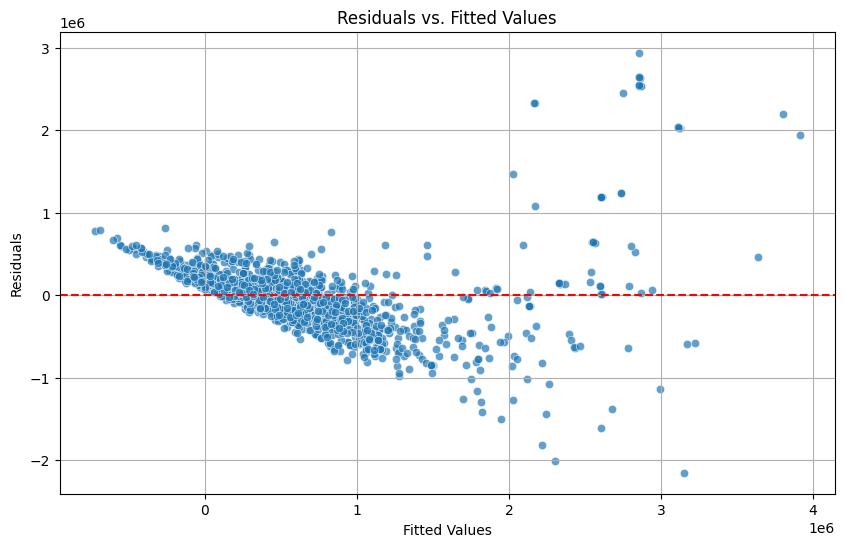

In [32]:
residuals = y_test - y_pred

# Create the residuals vs. fitted values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.grid(True)
plt.show()

### Shapiro-Wilk Normality Test

In [33]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p_value = shapiro(residuals)

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Residuals appear to be normally distributed (fail to reject H0).")
else:
    print("Residuals do not appear to be normally distributed (reject H0).")


Shapiro-Wilk Test Statistic: 0.8182267428083807
P-value: 5.285401987784313e-39
Residuals do not appear to be normally distributed (reject H0).


In [34]:
def drop_variables(data):
    columns_to_drop = ['engine', 'City_region', 'owner', 'Sales_status']
    data = data.drop(columns=columns_to_drop, errors='ignore')
    return data# code starts here

    # code ends here
    return data
cleaned_car_sales=drop_variables(cleaned_car_sales)
cleaned_car_sales

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,max_power,seats,city_East_city,city_North_city,city_South_city,city_West_city
0,2014,450000,145500,1,1,1,23.40,74.00,5,False,True,False,False
1,2014,370000,120000,1,1,1,21.14,103.52,5,True,False,False,False
2,2006,158000,140000,2,1,1,17.70,78.00,5,False,True,False,False
3,2010,225000,127000,1,1,1,23.00,90.00,5,False,True,False,False
4,2007,130000,120000,2,1,1,16.10,88.20,5,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000,2,1,1,18.50,82.85,5,False,True,False,False
7902,2007,135000,119000,1,1,1,16.80,110.00,5,False,True,False,False
7903,2009,382000,120000,1,1,1,19.30,73.90,5,True,False,False,False
7904,2013,290000,25000,1,1,1,23.57,70.00,5,False,False,True,False


**Apply Log transformation on target variable**

#### NOTE:
* Transform the target variable 'selling_price' into its natural logarithm ('ln_selling_price') using the numpy log function
* Return the ln_selling_price' column, which contains the transformed target variable values.

In [35]:
def target_transform(data):
    # Apply natural logarithm transformation to the target variable
    data["ln_selling_price"] = np.log(data["selling_price"])
    return data["ln_selling_price"]
target_transform(cleaned_car_sales)

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
7901    12.676076
7902    11.813030
7903    12.853176
7904    12.577636
7905    12.577636
Name: ln_selling_price, Length: 7906, dtype: float64

**Separate independent features and target variable**
#### NOTE:
* Extract the feature variables (X) by dropping the columns 'ln_selling_price' and 'selling_price' from the DataFrame df using the drop() method
* Extract the target variable (y) by selecting only the 'ln_selling_price' column from the DataFrame df.

In [36]:
def separate_data_and_target_new(df):
    # Extract feature variables by dropping target columns
    X = df.drop(columns=['selling_price', 'ln_selling_price'])

    # Extract target variable
    y = df['ln_selling_price']

    return X, y
X, y = separate_data_and_target_new(cleaned_car_sales)
print("---------X----------")
print(X)
print("----------y---------")
print(y)

---------X----------
      year  km_driven  fuel  seller_type  transmission  mileage  max_power  \
0     2014     145500     1            1             1    23.40      74.00   
1     2014     120000     1            1             1    21.14     103.52   
2     2006     140000     2            1             1    17.70      78.00   
3     2010     127000     1            1             1    23.00      90.00   
4     2007     120000     2            1             1    16.10      88.20   
...    ...        ...   ...          ...           ...      ...        ...   
7901  2013     110000     2            1             1    18.50      82.85   
7902  2007     119000     1            1             1    16.80     110.00   
7903  2009     120000     1            1             1    19.30      73.90   
7904  2013      25000     1            1             1    23.57      70.00   
7905  2013      25000     1            1             1    23.57      70.00   

      seats  city_East_city  city_North_ci

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

def split_into_train_and_test_normalize_features_2(X, y):
    # Splitting dataset to train and test sets (80% train and 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Instantiate the RobustScaler
    scaler = RobustScaler()

    # Fit the scaler to the training data and transform it
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the testing data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Now call the function and print the results
X_train, X_test, y_train, y_test = split_into_train_and_test_normalize_features_2(X, y)
print("--------X_train-----------")
print(X_train)
print("--------X_test-----------")
print(X_test)
print("--------y_train-----------")
print(y_train)
print("--------y_test-----------")
print(y_test)


--------X_train-----------
[[ 0.4         0.          1.         ...  1.          0.
   0.        ]
 [ 0.4        -0.53680707  0.         ...  0.          1.
   0.        ]
 [ 0.8        -0.76942347  0.         ...  0.          0.
   1.        ]
 ...
 [ 0.         -0.44733923  1.         ...  0.          0.
   1.        ]
 [-0.4         2.0219733   0.         ...  1.          0.
   0.        ]
 [-1.6         0.71574276  0.         ...  0.          1.
   0.        ]]
--------X_test-----------
[[ 0.4        -0.39365852  1.         ...  0.          0.
   1.        ]
 [ 0.8        -0.94778657  1.         ...  0.          0.
   1.        ]
 [-1.          0.89467845  0.         ...  0.          0.
   1.        ]
 ...
 [-2.2         1.07361414  1.         ...  1.          0.
   0.        ]
 [ 0.6         1.07361414  1.         ...  1.          0.
   0.        ]
 [ 0.2         1.07361414  0.         ...  0.          0.
   1.        ]]
--------y_train-----------
4976    12.765688
2026    13.997

In [38]:
from sklearn.linear_model import LinearRegression

def fit_the_model_on_the_training_data_2(data, X_train: np.ndarray, y_train: np.ndarray):
    # Instantiate the linear regression model
    regression = LinearRegression()

    # Fit the model on training data
    regression.fit(X_train, y_train)

    return regression

# Fit the model
final_model = fit_the_model_on_the_training_data_2(cleaned_car_sales, X_train, y_train)
print(final_model)


LinearRegression()


In [39]:
#Test the model on the testing dataset and return the predicted values for the test dataset
def test_the_finalmodel(model1, X_test):
    y_prediction = np.ndarray([])
    # code starts here


    # code ends here
    return y_prediction
#prediction
y_pred_1=test_the_finalmodel(final_model, X_test)
print(y_pred)

[ 601574.56629362 1195873.89550279   84776.01811487 ... -258268.0780129
  120770.76713717   80084.99952504]


In [40]:
def calculate_r_squared_finalmodel(y_true, y_pred):
    """
    Calculate the R-squared (coefficient of determination) metric using scikit-learn.

    Parameters:
    y_true : numpy.ndarray
        True target values.
    y_pred : numpy.ndarray
        Predicted target values.

    Returns:
    float
        R-squared value.
    """
    # Code starts here
    r_squared = r2_score(y_true, y_pred)
    # Code ends here
    return r_squared
#r-squared
r_squared_final_model = calculate_r_squared_finalmodel(y_test, y_pred_1)
print(r_squared_final_model)

TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array(12.99499955)` instead.

In [ ]:
def calculate_rmse_finalmodel(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) metric using scikit-learn.

    Parameters:
    y_true : numpy.ndarray
        True target values.
    y_pred : numpy.ndarray
        Predicted target values.

    Returns:
    float
        RMSE value.
    """
    # Code starts here
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse


# Calculate RMSE
rmse_final_model = calculate_rmse_finalmodel(y_test, y_pred_1)
print(rmse_final_model)

### Task 4: Summarize the findings of the analysis and draw conclusions with PPT / PDF. (weightage - 5 marks) (ME)

## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions

-------------------------------------------------- **ASSESSMENT ENDS HERE** ---------------------------------------------------------